In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import json

from rdkit import Chem
from sklearn.model_selection import train_test_split

In [8]:
path = "data/"
file = "smiles_train.txt"
seed = 0

In [9]:
df = pd.read_csv("{}{}".format(path, file), names = ["Smiles"])
df.head()

,Smiles
0,O=C1C(=Cc2ccc(F)cc2)Sc2ccccc21
1,COc1ccc(N2CCN(C(=O)c3cc4ccccc4[nH]3)CC2)cc1
2,c1ccc(CCCNC2CCCCN(CCOC(c3ccccc3)c3ccccc3)C2)cc1
3,Nc1nc(O)c(Br)c(-c2cccc(O)c2)n1
4,CCc1nc2ccc(Br)cc2c(=O)n1-c1nc2c(C)cc(C)cc2s1


In [10]:
#Check for duplicates
print(df.shape)
df = df.drop_duplicates(ignore_index=True)
print(df.shape)
#Check for null values
print(df.columns[df.isnull().sum() > 0])

(1272851, 1)
(1272851, 1)
Index([], dtype='object')


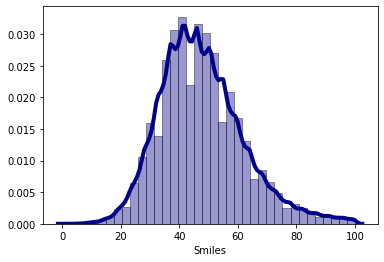

In [11]:
sns.distplot(df["Smiles"].str.len(), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [12]:
def check_Validity(df):
    num_mol = len(df["Smiles"])
    verbosity = int(num_mol*0.05)
    drop_index = []
    for i in range(num_mol):
        smile = df["Smiles"][i]
        if  i % verbosity == 0:
            print("{} out of {} = {}%".format(i,num_mol, int(i*100/num_mol)))
        mol = Chem.MolFromSmiles(smile)
        if mol is None:
            print("Invalid Molecule at index {}, {}".format(i,smile))
            drop_index.append(i)
    
    return df.drop(drop_index).reset_index(drop=True)

In [13]:
print(df.shape)
df = check_Validity(df)
print(df.shape)
df.head()

(1272851, 1)
0 out of 1272851 = 0%
63642 out of 1272851 = 4%
127284 out of 1272851 = 9%
190926 out of 1272851 = 14%
254568 out of 1272851 = 19%
318210 out of 1272851 = 24%
381852 out of 1272851 = 29%
445494 out of 1272851 = 34%
509136 out of 1272851 = 39%
572778 out of 1272851 = 44%
636420 out of 1272851 = 49%
700062 out of 1272851 = 54%
763704 out of 1272851 = 59%
827346 out of 1272851 = 64%
890988 out of 1272851 = 69%
954630 out of 1272851 = 74%
1018272 out of 1272851 = 79%
1081914 out of 1272851 = 84%
1145556 out of 1272851 = 89%
1209198 out of 1272851 = 94%
1272840 out of 1272851 = 99%
(1272851, 1)


,Smiles
0,O=C1C(=Cc2ccc(F)cc2)Sc2ccccc21
1,COc1ccc(N2CCN(C(=O)c3cc4ccccc4[nH]3)CC2)cc1
2,c1ccc(CCCNC2CCCCN(CCOC(c3ccccc3)c3ccccc3)C2)cc1
3,Nc1nc(O)c(Br)c(-c2cccc(O)c2)n1
4,CCc1nc2ccc(Br)cc2c(=O)n1-c1nc2c(C)cc(C)cc2s1


In [14]:
X_train, X_val = train_test_split(df, test_size=0.33, random_state=42)

In [15]:
appendix = "pp"
X_train.to_csv(f"{path}{appendix}_smiles_train.txt", index=None)
X_val.to_csv(f"{path}{appendix}_smiles_val.txt", index=None)

In [22]:
fixedEntries = {0: "Padding", 1:"Start", 2: "\n"}
smilesString = df["Smiles"].to_string(index=False)
int2char = dict(enumerate(sorted(set(smilesString)), len(fixedEntries)))
int2char.update(fixedEntries)
with open(f"{path}/int2char.txt", 'w') as f:
    json.dump(int2char, f)